# Методы машинного обучения – Контрольная работа №6

# Рекуррентные нейронные сети RNN

Импортируем необходимые библиотеки:

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
tf.__version__

'2.16.1'

## Задача аппроксимации синусоиды при помощи сети MLP

В нейронных сетях прямого распространения (многослойных перцептронах, сетях MLP) поток данных движется только в одном направлении, а именно от входного слоя к выходному через скрытые слои.

Рассмотрим сеть прямого распространения (сеть MLP) с одним скрытым слоем, использующую нелинейную функцию активации, чтобы распознать нелинейную зависимость, задаваемую синусоидой. 

Будем использовать сеть MLP с одним входным нейроном, десятью скрытыми нейронами и одним выходным нейроном. Скрытые нейроны используют функцию активации гиперболический тангенс ($\tanh$), тогда как выходной слой использует тождественную функцию активации. 

In [3]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=(1,), activation='tanh', name='HiddenLayer'),  
  tf.keras.layers.Dense(1, name='OutputLayer')])

C:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ HiddenLayer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

При обучении нейронной сети будем использовать оптимизатор `rmsprop` (применяется по умолчанию). В качестве функции ошибок (потерь) будем использовать среднеквадратичную ошибку MSE (mean squared error), а для оценки качества модели – среднюю абсолютную ошибку MAE (mean absolute error).

In [5]:
model.compile(optimizer="rmsprop", # по умолчанию
              loss="mse",
              metrics=["mae"])

Обучающие данные содержат $50$ точек $x_{i}$, выбранных случайным образом в диапазоне $\left[-10,\,10\right]$, где $y_{i}=\sin\left(x_{i}\right)$. 

In [6]:
x_train = 20 * np.random.random(50) - 10
y_train = np.sin(x_train)

x_plot = np.linspace(-10,10,101)
y_plot = np.sin(x_plot)

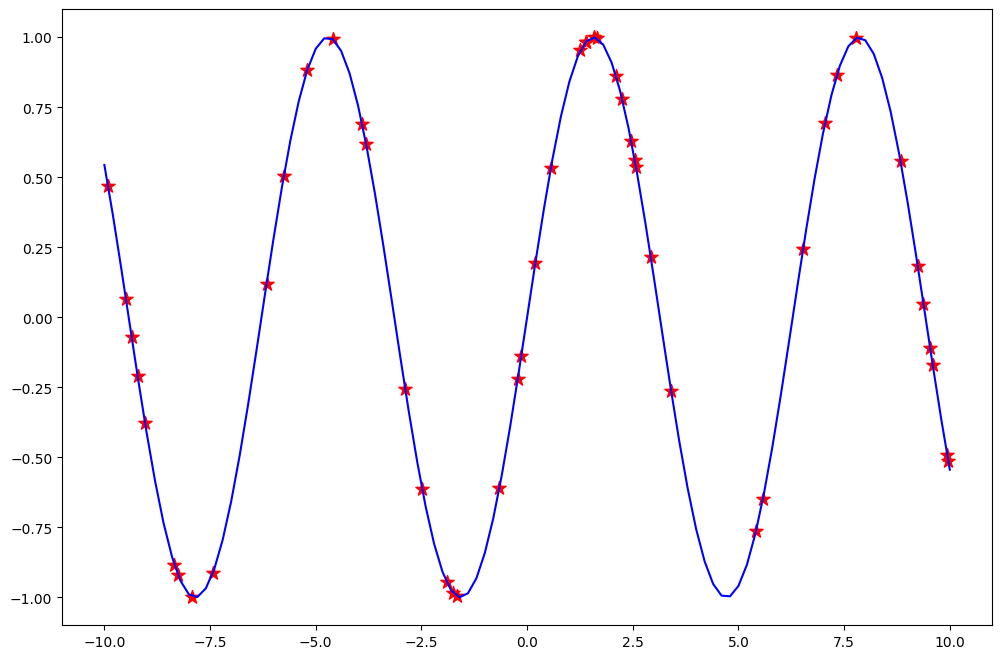

In [7]:
mpl.rcParams['figure.figsize'] = (12,8)

plt.plot(x_plot, y_plot, c='b')
plt.scatter(x_train, y_train, s=100, c='r', marker='*');

Будем обучать нейронную сеть на сгенерированных 50 точках, увеличивая количество эпох обучения:

In [8]:
model.fit(x_train, y_train, epochs=1000, verbose=0);

Оценим качество полученной модели на множестве равноотстоящих точек из отрезка $[-10,10]$:

In [9]:
x_pred = np.linspace(-10,10,1001)
y_pred = model.predict(x_pred)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Для визуализации прогноза модели будем использовать функцию:

MSE: 0.330, MAE:0.476


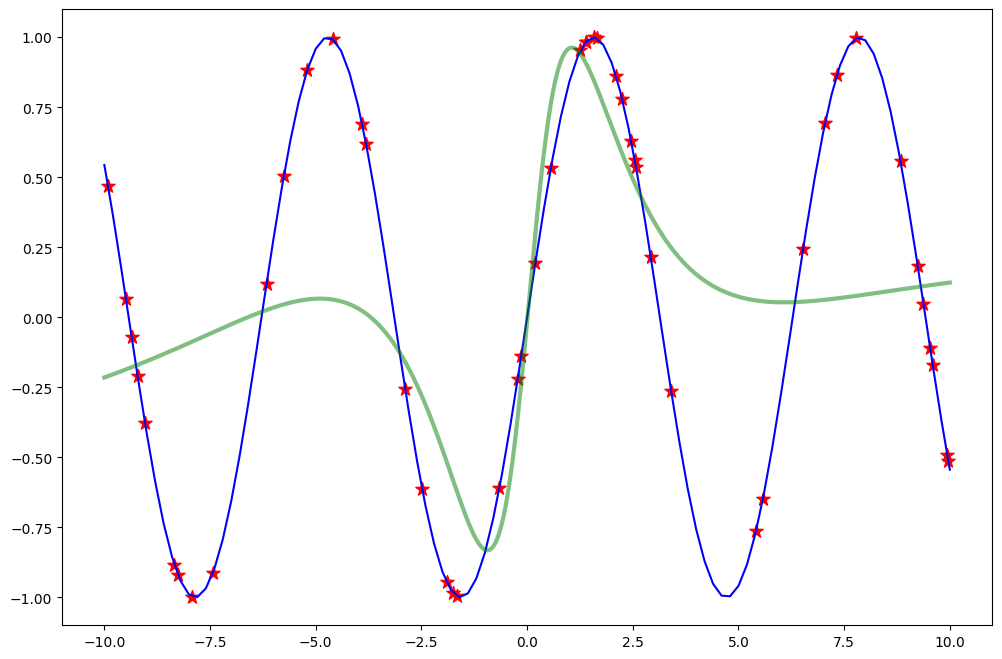

In [10]:
def show_sin():
    print('MSE: {:.3f}, MAE:{:.3f}'.format(*model.evaluate(x_plot, y_plot, verbose=0)))

    plt.plot(x_plot, y_plot, c='b')
    plt.scatter(x_train, y_train, s=100, c='r', marker='*')
    plt.plot(x_pred, y_pred, c='g', lw=3, alpha=0.5);
    
show_sin()

Увеличим количество эпох обучения до десяти тысяч:

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE: 0.157, MAE:0.272


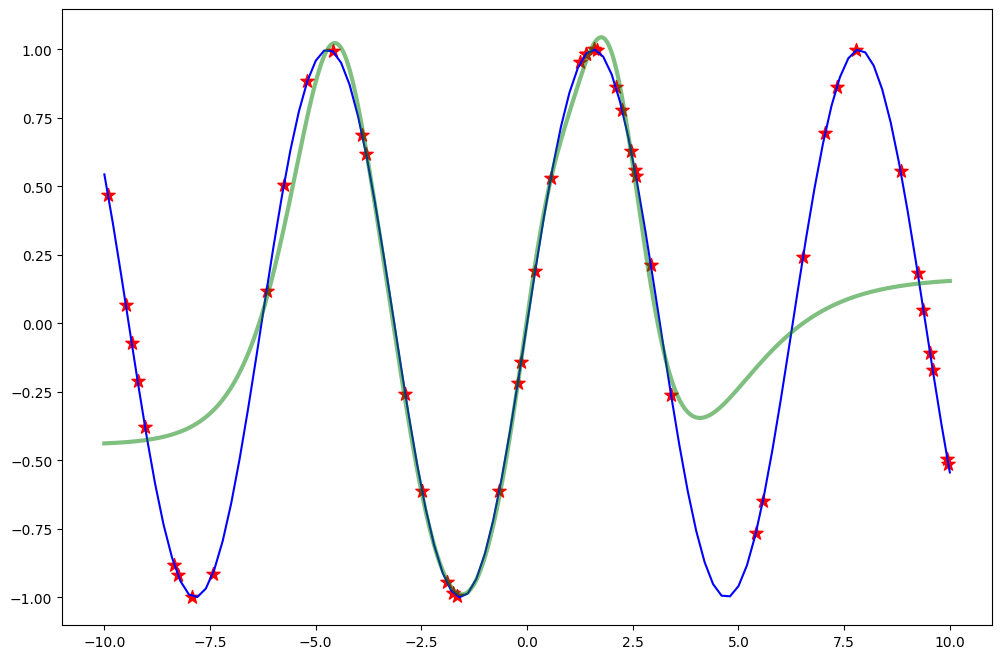

In [11]:
model.fit(x_train, y_train, initial_epoch=1000, epochs=10000, verbose=0);
y_pred = model.predict(x_pred)
show_sin()

До двацати тысяч:

CPU times: total: 3min 11s
Wall time: 9min 25s
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE: 0.112, MAE:0.211


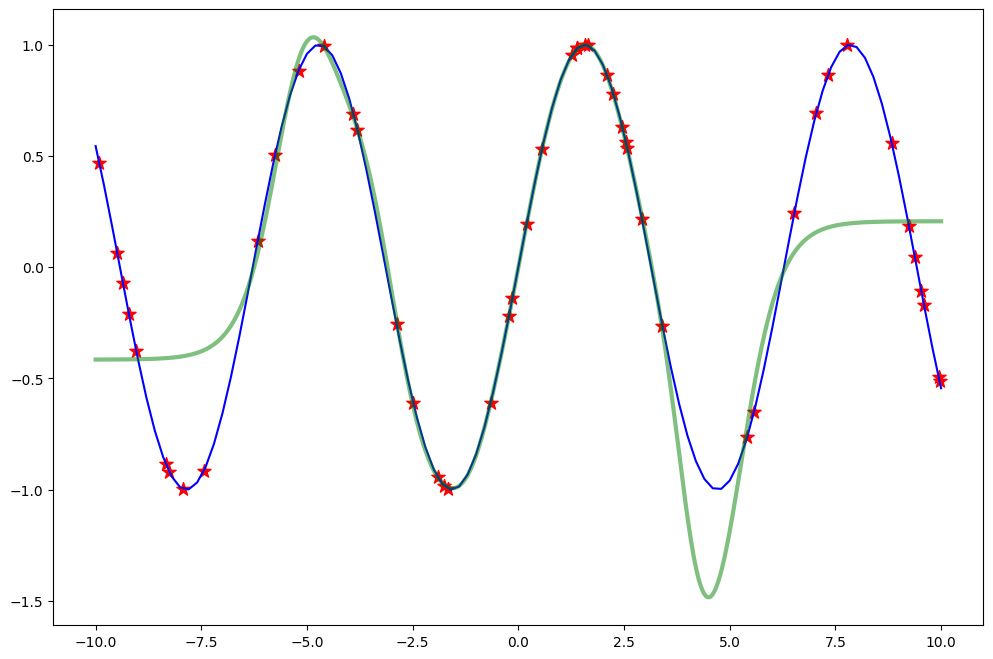

In [12]:
%time model.fit(x_train, y_train, initial_epoch=10000, epochs=20000, verbose=0);
y_pred = model.predict(x_pred)
show_sin()

И, наконец, до тридцати тысяч:

CPU times: total: 3min
Wall time: 9min 29s
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE: 0.008, MAE:0.052


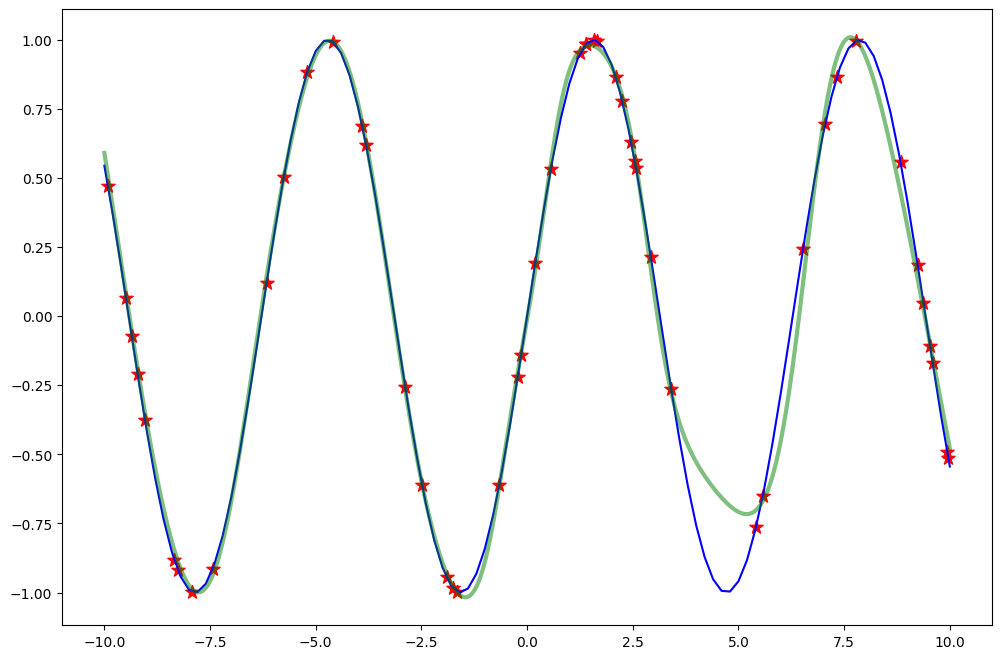

In [13]:
%time model.fit(x_train, y_train, initial_epoch=20000, epochs=30000, verbose=0);
y_pred = model.predict(x_pred)
show_sin()

Рисунок свидетельствует о хорошем качестве аппроксимации синусоиды нейронной сетью.

Однако выполним прогноз для значений из расширенного диапазона $[-20,20]$ и нарисуем кривые:

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE: 0.008, MAE:0.052


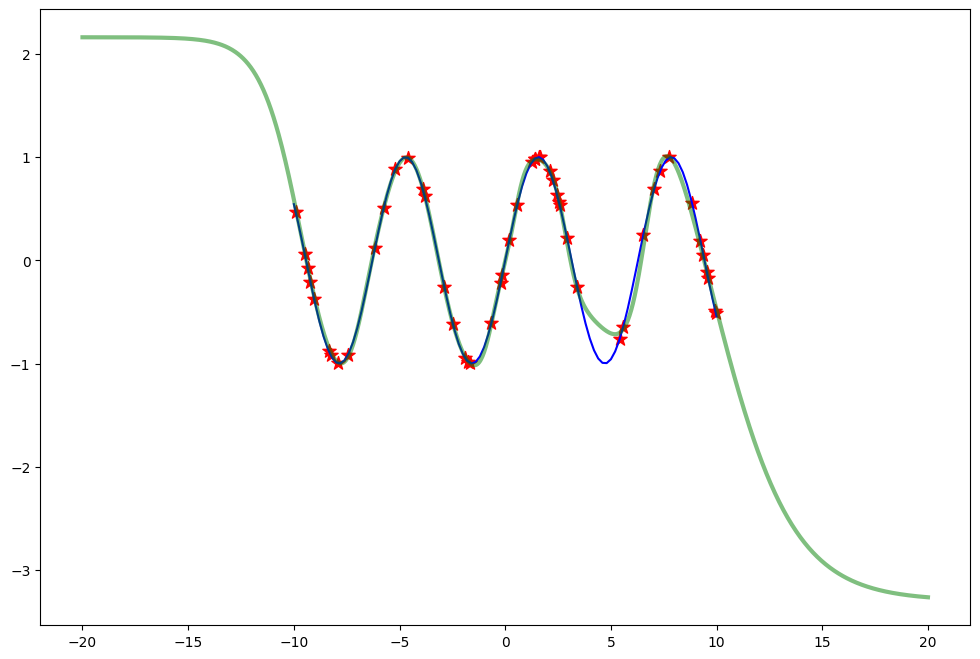

In [14]:
x_pred = np.linspace(-20,20,1001)
y_pred = model.predict(x_pred)

show_sin()

Таким образом, фактически нейронная сеть прямого распространения только аппроксимировала синусоиду на интервале $[-10,10]$ и не выявила периодичность аппроксимируемой функции. 

## Задача прогнозирования поведения синусоиды при помощи сети MLP

Рассмотрим теперь задачу прогнозирования значений синусоиды.

Будем рассматривать в качестве исходного датасета набор значений синусоиды на интервале от $[-10,10]$.

In [15]:
ds_data = np.sin(np.linspace(-10,10,1001))

Обучающая выборка составляет 80% всех данных:

In [16]:
train_size = int(len(ds_data) * 0.8)
test_size = len(ds_data) - train_size
ds_train, ds_test = ds_data[:train_size], ds_data[train_size:]
ds_train.shape, ds_test.shape

((800,), (201,))

Конвертируем исходный набор в нужный формат:

In [17]:
def create_ds(ds, look_back=1):
  dataX, dataY = [], []
  for i in range(len(ds)-look_back-1):
    a = ds[i:(i+look_back)]
    dataX.append(a)
    dataY.append(ds[i + look_back])
  return np.array(dataX), np.array(dataY)

Будем делать прогноз на основе 10 предыдущих значений:

In [18]:
look_back = 10
trainX, trainY = create_ds(ds_train, look_back=look_back)
testX, testY = create_ds(ds_test, look_back=look_back)
trainX.shape, trainY.shape, testX.shape, testY.shape

((789, 10), (789,), (190, 10), (190,))

Изменим форму обучающего и тестового наборов данных:

In [19]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape, testX.shape

((789, 1, 10), (190, 1, 10))

Создадим сеть MLP с одним скрытым слоем:

In [20]:
model_mlp = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=(1,look_back), activation='tanh', name='HiddenLayer'),  
  tf.keras.layers.Dense(1, name='OutputLayer')])
model_mlp.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ HiddenLayer (Dense)                  │ (None, 1, 10)               │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 1, 1)                │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
model_mlp.compile(loss='mean_squared_error', optimizer='adam')
model_mlp.fit(trainX, trainY, epochs=100, batch_size=128, verbose=2)

Epoch 1/100
7/7 - 1s - 212ms/step - loss: 0.6601
Epoch 2/100
7/7 - 0s - 19ms/step - loss: 0.5652
Epoch 3/100
7/7 - 0s - 9ms/step - loss: 0.5130
Epoch 4/100
7/7 - 0s - 11ms/step - loss: 0.4908
Epoch 5/100
7/7 - 0s - 22ms/step - loss: 0.4872
Epoch 6/100
7/7 - 0s - 13ms/step - loss: 0.4886
Epoch 7/100
7/7 - 0s - 11ms/step - loss: 0.4872
Epoch 8/100
7/7 - 0s - 23ms/step - loss: 0.4874
Epoch 9/100
7/7 - 0s - 26ms/step - loss: 0.4860
Epoch 10/100
7/7 - 0s - 24ms/step - loss: 0.4855
Epoch 11/100
7/7 - 0s - 10ms/step - loss: 0.4851
Epoch 12/100
7/7 - 0s - 9ms/step - loss: 0.4849
Epoch 13/100
7/7 - 0s - 14ms/step - loss: 0.4849
Epoch 14/100
7/7 - 0s - 24ms/step - loss: 0.4850
Epoch 15/100
7/7 - 0s - 23ms/step - loss: 0.4851
Epoch 16/100
7/7 - 0s - 23ms/step - loss: 0.4853
Epoch 17/100
7/7 - 0s - 25ms/step - loss: 0.4850
Epoch 18/100
7/7 - 0s - 22ms/step - loss: 0.4849
Epoch 19/100
7/7 - 0s - 11ms/step - loss: 0.4850
Epoch 20/100
7/7 - 0s - 10ms/step - loss: 0.4849
Epoch 21/100
7/7 - 0s - 11ms/s

Выполним прогноз:

In [22]:
trainPredict = model_mlp.predict(trainX)
testPredict = model_mlp.predict(testX)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Используем для оценки качества показатель RMSE, вычисляемый через MSE:

In [23]:
def my_mse(y_test, y_predict):
    return np.sum((y_predict - y_test)**2) / len(y_test)

In [24]:
trainScore = np.sqrt(my_mse(trainY, trainPredict.reshape(-1)))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(my_mse(testY, testPredict.reshape(-1)))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.69 RMSE
Test Score: 0.73 RMSE


Для корректной визуализации данных нужно сдвинуть данные:

In [25]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(ds_data)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back] = trainPredict.reshape(-1)

In [26]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(ds_data)
testPredictPlot[:,] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(ds_data) - 1] = testPredict.reshape(-1)

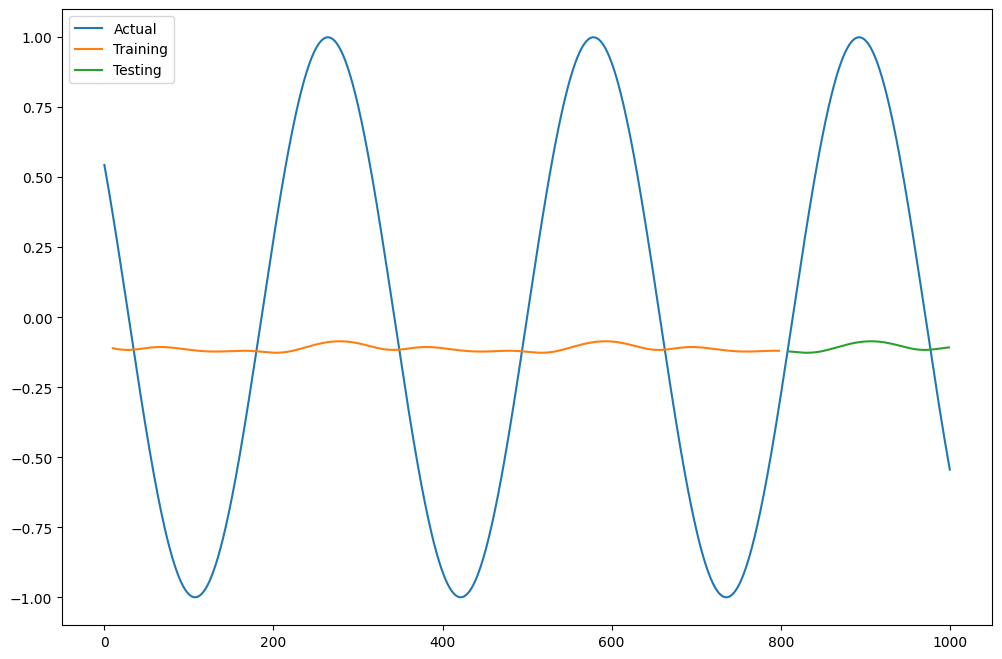

In [27]:
plt.plot(ds_data, label='Actual')
plt.plot(trainPredictPlot.reshape(-1), label='Training')
plt.plot(testPredictPlot.reshape(-1), label='Testing')
plt.legend(loc='best');

### Решение проблемы исчезающих градиентов

#### Инициализация весов

Для управления инициализацией весов нужно указать при создании слоя параметр `kernel_initializer`, например, так:

`tf.keras.layers.Dense(10, activation = "relu", kernel_initializer="he_normal")`

или

`tf.keras.layers.Dense(10, activation = "relu", kernel_initializer="he_uniform")`

или

`tf.keras.layers.Dense(10, activation = "sigmoid", kernel_initializer=keras.initializers.VarianceScaling(scale=2., mode='fan_avg', distribution='uniform'))`

#### Использование функций активации без насыщения

Например, можно использовать функцию активации `SELU` (Scaled Exponential Linear Unit) с инициализацией весов `lecun_normal` так:

`model.add(tf.keras.layers.Dense(10, kernel_initializer='lecun_normal',
                                 activation='selu'))`

#### Пакетная нормализация (Batch Normalization)

Слой пакетной нормализации может быть добавлен в модель так:

`model.add(tf.keras.layers.BatchNormalization())`

#### Обрезка градиентов (Gradient Clipping)

При обрезке градентов при задании оптимизатора в методе `compile()` указывается параметр `clipvalue` или `clipnorm`, например: 

`model.compile(optimizer=optimizer = keras.optimizers.SGD(clipvalue = 1.0),
              loss="mse", metrics=["mae"])`   

или

`model.compile(optimizer=optimizer = keras.optimizers.SGD(clipnorm = 1.0),
              loss="mse", metrics=["mae"])` 

Попробуем решить задачу прогноза значений синусоиды при помощи глубокой сети MLP с применением пакетной нормализации, функций активации без насыщения и альтернативной инициализации весов:

In [28]:
model_dmlp = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,look_back), 
                          kernel_initializer='lecun_normal', activation='selu'),  
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, kernel_initializer='lecun_normal', activation='selu'),  
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, name='OutputLayer')])
model_dmlp.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1, 10)               │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 10)               │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1, 10)               │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1, 10)               │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 1, 1)                │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 311 (1.21 KB)

 Trainable params: 271 (1.06 KB)

 Non-trainable params: 40 (160.00 B)

In [29]:
model_dmlp.compile(loss='mean_squared_error', optimizer='adam')
model_dmlp.fit(trainX, trainY, epochs=100, batch_size=128, verbose=2)

Epoch 1/100
7/7 - 4s - 536ms/step - loss: 0.8023
Epoch 2/100
7/7 - 0s - 10ms/step - loss: 0.5292
Epoch 3/100
7/7 - 0s - 27ms/step - loss: 0.5054
Epoch 4/100
7/7 - 0s - 23ms/step - loss: 0.4968
Epoch 5/100
7/7 - 0s - 23ms/step - loss: 0.4925
Epoch 6/100
7/7 - 0s - 25ms/step - loss: 0.4899
Epoch 7/100
7/7 - 0s - 20ms/step - loss: 0.4887
Epoch 8/100
7/7 - 0s - 9ms/step - loss: 0.4874
Epoch 9/100
7/7 - 0s - 10ms/step - loss: 0.4866
Epoch 10/100
7/7 - 0s - 11ms/step - loss: 0.4863
Epoch 11/100
7/7 - 0s - 8ms/step - loss: 0.4860
Epoch 12/100
7/7 - 0s - 9ms/step - loss: 0.4861
Epoch 13/100
7/7 - 0s - 9ms/step - loss: 0.4859
Epoch 14/100
7/7 - 0s - 10ms/step - loss: 0.4856
Epoch 15/100
7/7 - 0s - 9ms/step - loss: 0.4857
Epoch 16/100
7/7 - 0s - 9ms/step - loss: 0.4853
Epoch 17/100
7/7 - 0s - 9ms/step - loss: 0.4855
Epoch 18/100
7/7 - 0s - 9ms/step - loss: 0.4853
Epoch 19/100
7/7 - 0s - 9ms/step - loss: 0.4852
Epoch 20/100
7/7 - 0s - 11ms/step - loss: 0.4851
Epoch 21/100
7/7 - 0s - 10ms/step - l

In [30]:
trainPredict = model_dmlp.predict(trainX)
testPredict = model_dmlp.predict(testX)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [31]:
trainScore = np.sqrt(my_mse(trainY, trainPredict.reshape(-1)))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(my_mse(testY, testPredict.reshape(-1)))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.70 RMSE
Test Score: 0.76 RMSE


## Рекуррентная нейронная сеть RNN

__Рекуррентные нейронные сети__ (Recurrent Neural Networks, __RNN__) включают обратную связь от одного уровня к другому, и их обычно можно обучить, развертывая рекуррентные соединения, в результате чего получаются глубокие сети, параметры которых можно обучить с помощью алгоритма обратного распространения ошибки. 

Если многослойные персептроны представляют собой сети прямого распространения, в которых информация движется только в одном направлении, а именно от входного слоя к выходному через скрытые слои, то рекуррентные нейронные сети (RNN) содержат петли (циклы) обратной связи между двумя (или более) слоями, что делает их идеальными для обучения на основе входных данных в форме последовательностей. 

Задача сети RNN состоит в том, чтобы аппроксимировать функцию, которая предсказывает целевую выходную последовательность $\mathcal{Y}$ по заданной входной последовательности $\mathcal{X}$. То есть прогнозируемые выходные данные (результат) $\mathbf{o}_{t}$ для входных данных $\mathbf{x}_{t}$ должны быть аналогичны или близки к целевому отклику $\mathbf{y}_{t}$ для каждого момента времени $t$.

In [32]:
model_rnn = tf.keras.Sequential([
  tf.keras.layers.SimpleRNN(10, input_shape=(1,look_back), name='HiddenLayer'),  
  tf.keras.layers.Dense(1, name='OutputLayer')])
model_rnn.summary()

C:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ HiddenLayer (SimpleRNN)              │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
trainX.shape, trainY.shape

((789, 1, 10), (789,))

In [34]:
model_rnn.compile(loss='mean_squared_error', optimizer='adam')
model_rnn.fit(trainX, trainY, epochs=100, batch_size=128, verbose=2)

Epoch 1/100
7/7 - 2s - 357ms/step - loss: 0.2105
Epoch 2/100
7/7 - 0s - 8ms/step - loss: 0.0832
Epoch 3/100
7/7 - 0s - 7ms/step - loss: 0.0228
Epoch 4/100
7/7 - 0s - 8ms/step - loss: 0.0070
Epoch 5/100
7/7 - 0s - 7ms/step - loss: 0.0077
Epoch 6/100
7/7 - 0s - 7ms/step - loss: 0.0083
Epoch 7/100
7/7 - 0s - 11ms/step - loss: 0.0065
Epoch 8/100
7/7 - 0s - 7ms/step - loss: 0.0050
Epoch 9/100
7/7 - 0s - 7ms/step - loss: 0.0047
Epoch 10/100
7/7 - 0s - 8ms/step - loss: 0.0046
Epoch 11/100
7/7 - 0s - 13ms/step - loss: 0.0045
Epoch 12/100
7/7 - 0s - 10ms/step - loss: 0.0044
Epoch 13/100
7/7 - 0s - 11ms/step - loss: 0.0043
Epoch 14/100
7/7 - 0s - 12ms/step - loss: 0.0042
Epoch 15/100
7/7 - 0s - 10ms/step - loss: 0.0042
Epoch 16/100
7/7 - 0s - 10ms/step - loss: 0.0041
Epoch 17/100
7/7 - 0s - 13ms/step - loss: 0.0040
Epoch 18/100
7/7 - 0s - 9ms/step - loss: 0.0040
Epoch 19/100
7/7 - 0s - 12ms/step - loss: 0.0039
Epoch 20/100
7/7 - 0s - 9ms/step - loss: 0.0038
Epoch 21/100
7/7 - 0s - 11ms/step - lo

In [35]:
trainPredict = model_rnn.predict(trainX)
testPredict = model_rnn.predict(testX)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [36]:
trainScore = np.sqrt(my_mse(trainY, trainPredict.reshape(-1)))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(my_mse(testY, testPredict.reshape(-1)))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.02 RMSE
Test Score: 0.02 RMSE


In [37]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(ds_data)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back] = trainPredict.reshape(-1)

In [38]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(ds_data)
testPredictPlot[:,] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(ds_data) - 1] = testPredict.reshape(-1)

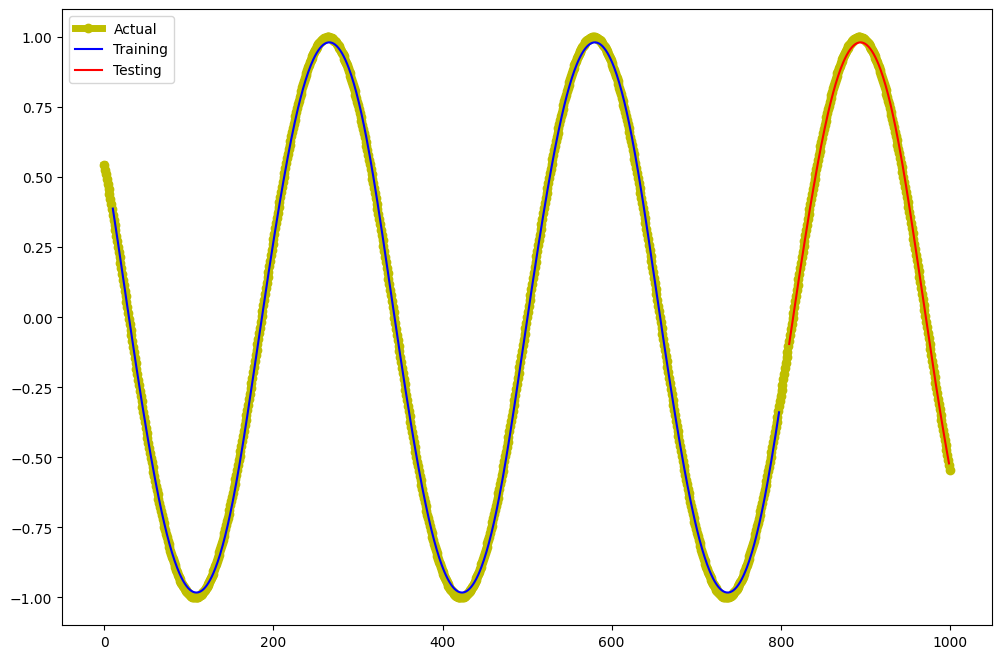

In [39]:
plt.plot(ds_data, marker='o', c='y', lw=5, label='Actual')
plt.plot(trainPredictPlot.reshape(-1), c='b', label='Training')
plt.plot(testPredictPlot.reshape(-1), c='r', label='Testing')
plt.legend(loc='best');

Рассмотрим теперь более общую задачу прогнозирования значений временного ряда.

## Прогнозирование значений временного ряда

_Временной ряд_ представляет собой любые данные, полученные путем измерений через равные промежутки времени, например, дневная цена акции, почасовое потребление электроэнергии в городе или еженедельные продажи в магазине. Временные ряды встречаются в различных сферах  деятельности от изучения природных явлений (сейсмическую активность, эволюция популяций рыб в реке, погода в определенном месте и пр.) до экономики (посетители веб-сайта, ВВП страны, операции с кредитными картами и т.п.).

Наиболее распространенной задачей, связанной с временными рядами, является прогнозирование – предсказание дальнейшей динамики временного ряда. Необходимо прогнозировать потребление электроэнергии, чтобы предвидеть спрос; прогнозировать доход на несколько месяцев вперед, чтобы планировать бюджет; прогнозировать погоду на несколько дней вперед, чтобы планировать расписание.

Рассмотрим задачу прогнозирования температуры воздуха через 24 часа, учитывая временной ряд часовых измерений таких величин, как атмосферное давление и влажность. 

Этот набор данных был записан на метеостанции в Институте биогеохимии им. Макса Планка в Йене, Германия. В этом наборе 14 различных величин (таких как температура, давление, влажность, направление ветра и т.д.) записанных с интервалом 10 минут за несколько лет. Набор можно загрузить по адресу `https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip`.

In [40]:
import os
fname = os.path.join("D:\\MethodsML\\DATA\\jena_climate_2009_2016.csv")

with open(fname) as f:
    data = f.read()

# data = pd.read_csv('https://github.com/surajp92/Machine_Learning/raw/master/jena_climate_2009_2016.csv')

lines = data.split("\n")      # list with headers and text lines with date and data
header = lines[0].split(",")  # list of column names
lines = lines[1:]             # list of text lines with date and data
print('Атрибуты набора данных:', header)
print('\nКоличество записей:', len(lines))
# data.head()

Атрибуты набора данных: ['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']

Количество записей: 420551


Всего в наборе 420451 строк данных (записей), содержащих метку с датой/временем и 14 погодных показателей. Исключим столбец с датой/временем и загрузим температурные показатели в массив `temperature` и все показатели (включая температуру) в массив `raw_data`. 

Нарисуем также график температуры (в градусах Цельсия) в зависимости от времени (номера записи):

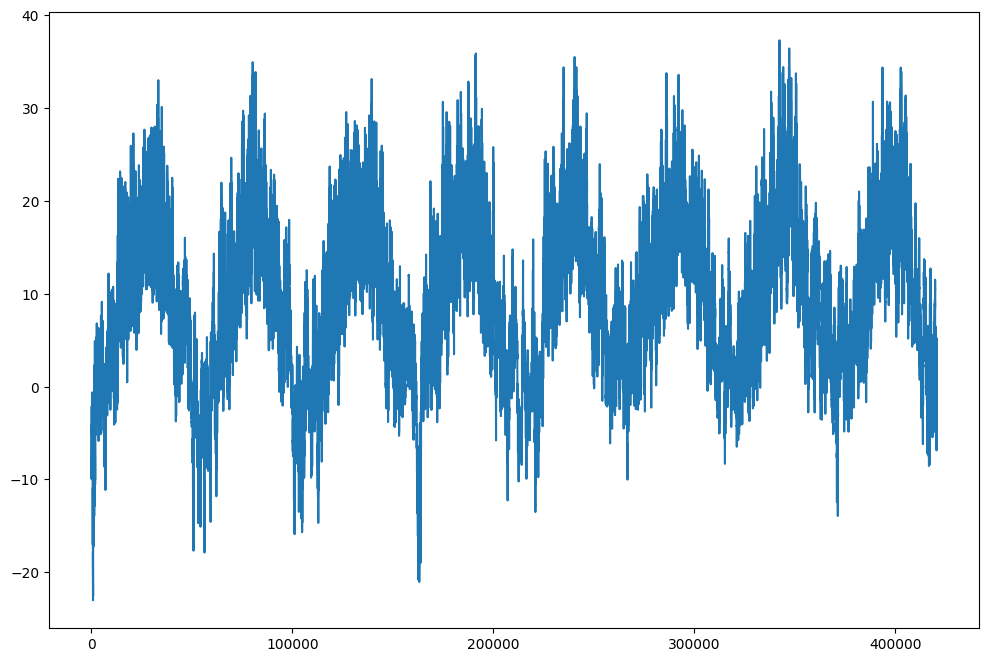

In [41]:
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]] # list of values w/o date
    temperature[i] = values[1]                       # temperature only
    raw_data[i, :] = values[:]                       # all values
    
plt.plot(range(len(temperature)), temperature);

На графике прослеживаются сезонные изменения температуры (за 8 лет). Однако температура также изменяется в зависимости от времени суток. Это видно на температурном графике за 10 дней (т.к. данные измеряются каждые 10 минут, ежедневно сохраняется $24 * 6 = 144$ записи).

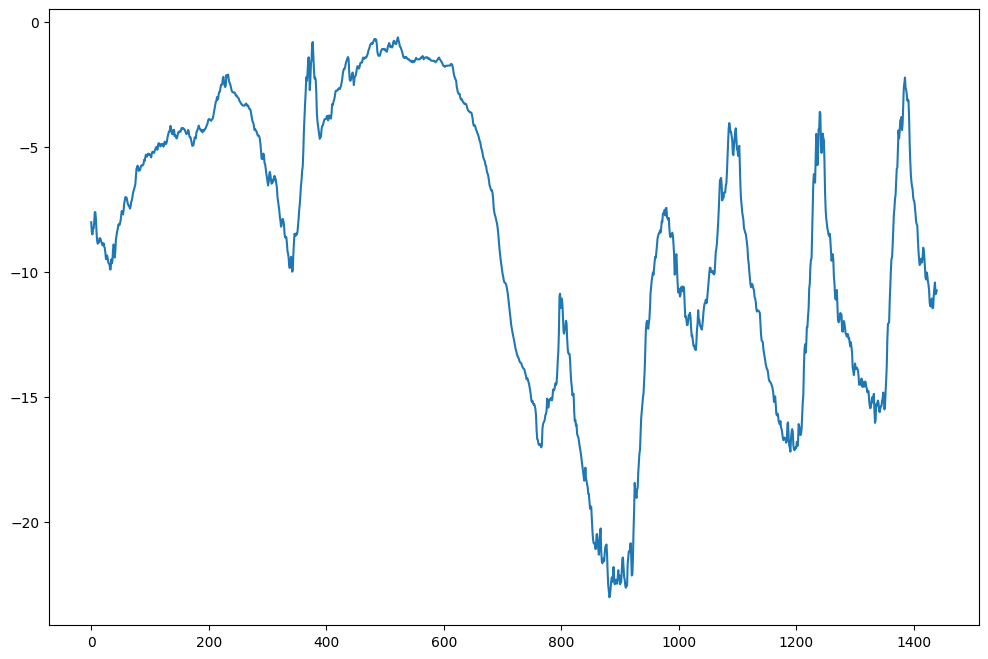

In [42]:
plt.plot(range(1440), temperature[:1440]); # 1440 = 10 x 24 x 6 

Будем использовать первые 50% данных в наборе для обучения, следующие 25% для валидации и последние 25% для тестирования. Вычислим количество записей в обучающей, валидационной и тестовой выборках: 

In [43]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 210275
num_val_samples: 105137
num_test_samples: 105139


Нормализуем каждый столбец в массиве `raw_data` по данным обучающей выборки (по первым `num_train_samples` записям), чтобы все столбцы принимали небольшие значения в одинаковом масштабе:

In [44]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std # whole raw_data normalized w.r.t. first num_train_samples rows

mean.shape, std.shape

((14,), (14,))

Теперь создадим набор (объект) с данными за последние пять дней вместе с целевым показателем температуры через 24 часа. Для этого используем встроенную в модуль Keras функцию `timeseries_dataset_from_array()`. Чтобы проиллюстрировать работу этой функции, рассмотрим следующий простой пример:

In [45]:
int_sequence = np.arange(10)   # [0,1,2,3,4,5,6,7,8,9]
dummy_dataset = tf.keras.utils.timeseries_dataset_from_array( # объект BatchDataset
    data=int_sequence[:-3],    # [0,1,2,3,4,5,6]
    targets=int_sequence[3:],  # [3,4,5,6,7,8,9]
    sequence_length=3,         # длина последовательности
    batch_size=2,              # размер батча (пакета)
)

for inputs, targets in dummy_dataset: # tf.Tensor objects
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))
    print("-"*10)

[0, 1, 2] 3
[1, 2, 3] 4
----------
[2, 3, 4] 5
[3, 4, 5] 6
----------
[4, 5, 6] 7
----------


Используем `timeseries_dataset_from_array()` для создания трех наборов данных (объектов `BatchDataset`) – для обучения, для валидации и для тестирования со следующими значениями параметров:

* `sample_rate = 6` — наблюдения будут производиться в одной точке данных в час - будем хранить только одну точку данных из 6;
* `sequence_length=120` — наблюдения будут браться за 5 дней (120 часов);
* `delay=sampling_rate*(sequence_length+24-1)` — целью для входной последовательности будет температура через 24 часа после окончания последовательности;

При создании набора обучающих данных передадим в функцию аргементы `start_index = 0` и `end_index = num_train_samples`, чтобы использовать только первые 50% данных. Для набора данных валидации передадим в функцию `start_index = num_train_samples` и `end_index = num_train_samples + num_val_samples`, чтобы использовать следующие 25% данных. Наконец, для тестового набора данных передадим `start_index=num_train_samples+num_val_samples`, чтобы использовать оставшиеся данные.

In [46]:
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = tf.keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = tf.keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = tf.keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

Каждый набор данных содержит кортежи `(samples, targets)`, где `samples` представляет собой пакет из 256 записей, каждая из которых содержит 120 последовательных часовых записей данных, а `targets` представляет собой соответствующий массив из 256 температур. Обратите внимание, что записи перемешиваются случайным образом, поэтому две соседние последовательности в пакете (например, `samples[0]` и `samples[1]`) не обязательно близки по времени.

In [47]:
for samples, targets in train_dataset: # shapes in first data batch
    print("Форма признаков:", samples.shape)
    print("Форма откликов:", targets.shape)
    break # first batch only

Форма признаков: (256, 120, 14)
Форма откликов: (256,)


Оценим ошибку для следующего элементарного подхода к прогнозированию температуры, когда в качестве прогнозного значения температуры через 24 часа принимается текущее значение температуры. В качестве показателя качества модели прогнозирования будем использовать метрику MAE (mean absolute error):

In [48]:
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1] # std and mean of temperature
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

print(f"MAE на валидационном наборе: {evaluate_naive_method(val_dataset):.2f}")
print(f"MAE на тестовом наборе: {evaluate_naive_method(test_dataset):.2f}")

MAE на валидационном наборе: 2.44
MAE на тестовом наборе: 2.62


## Функциональный интерфейс Keras

В модуле __Keras__ имеется два интерфейса (API) для быстрого построения архитектур нейронных сетей: последовательный интерфейс (Sequential API) и функциональный интерфейс (Functional API). Первый интерфейс позволяет строить только последовательные архитектуры нейронных сетей, в которых выход каждого слоя передается на вход следующего слоя. При помощи функционального интерфейса можно задать нейронную сеть в виде произвольного направленного ациклического графа, что дает намного больше возможностей для построения сложных моделей. В частности, функциональный интерфейс может обрабатывать модели с нелинейной топологией, модели с общими слоями, и модели с несколькими входами или выходами.

Воссоздадим при помощи функционального интерфейса глубокую сеть MLP, ранее созданную при помощи последовательного интерфейса:

In [49]:
model_dmlp.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1, 10)               │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 10)               │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1, 10)               │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1, 10)               │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 1, 1)                │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 855 (3.34 KB)

 Trainable params: 271 (1.06 KB)

 Non-trainable params: 40 (160.00 B)

 Optimizer params: 544 (2.13 KB)

Сначала создаем входные данные нейронной сети:

In [50]:
inputs = tf.keras.layers.Input(shape=(1,look_back))

Здесь указывается размерность данных, при этом количество данных всегда опускается. Переменная `inputs` содержит информацию о размерах и типе данных которые будут передаваться в модель: 

In [51]:
inputs.shape, inputs.dtype

((None, 1, 10), 'float32')

Создаем новый слой в графе слоев с `inputs` в качестве входных данных:

In [52]:
x = tf.keras.layers.Dense(10, kernel_initializer='lecun_normal', activation='selu')(inputs)

Добавим еще несколько слоев в граф слоев:

In [53]:
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10, kernel_initializer='lecun_normal', activation='selu')(x)  
x = tf.keras.layers.BatchNormalization()(x)

Наконец, добавим последний слой:

In [54]:
outputs = tf.keras.layers.Dense(1, name='OutputLayer')(x)

Теперь создаем модель, указав ее входы и выходы в графе слоев:

In [55]:
model_dmlp2 = tf.keras.Model(inputs=inputs, outputs=outputs)
model_dmlp2.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 1, 10)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1, 10)               │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1, 10)               │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1, 10)               │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 1, 10)               │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 1, 1)                │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 311 (1.21 KB)

 Trainable params: 271 (1.06 KB)

 Non-trainable params: 40 (160.00 B)

Можем начертить модель в виде графа:

In [56]:
tf.keras.utils.plot_model(model_dmlp2)

You must install pydot (`pip install pydot`) for `plot_model` to work.


Можно вывести размерности входа и выхода каждого слоя на построенном графе:

In [57]:
tf.keras.utils.plot_model(model_dmlp2, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


Обучение, оценка качества и прогноз работают для моделей, построенных с использованием функционального интерфейса, точно так же как и для последовательных моделей.

## Прогнозирование температуры при помощи сети MLP

Рассмотрим модель нейронной сети прямого распространения (сети MLP), которая начинается с выравнивания данных, а затем проходит через два плотных слоя. Функция активации на последнем плотном слое (выходном слое)  отсутствует, что типично для задачи регрессии. В качестве потерь используется среднеквадратичную ошибку (MSE), так как, в отличие от MAE, функция MSE гладкая около нуля, что является полезным свойством для градиентного спуска. Показатель MAE будет отслеживаться в качестве метрики модели.

In [58]:
inputs = tf.keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(16, activation="relu")(x)
outputs = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=5,
                    validation_data=val_dataset,
                   ) 

print(f"MAE на тестовом наборе: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node functional_7_1/flatten_1/Reshape defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\fitte\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\fitte\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\fitte\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\fitte\AppData\Roaming\Python\Python312\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Python312\Lib\asyncio\base_events.py", line 639, in run_forever

  File "C:\Python312\Lib\asyncio\base_events.py", line 1985, in _run_once

  File "C:\Python312\Lib\asyncio\events.py", line 88, in _run

  File "C:\Users\fitte\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\fitte\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\fitte\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\fitte\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\fitte\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\fitte\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\fitte\AppData\Roaming\Python\Python312\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\fitte\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\fitte\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\fitte\AppData\Roaming\Python\Python312\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\fitte\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\fitte\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\fitte\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\fitte\AppData\Local\Temp\ipykernel_12040\3204359214.py", line 8, in <module>

  File "C:\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 329, in fit

  File "C:\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 122, in one_step_on_iterator

  File "C:\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 110, in one_step_on_data

  File "C:\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 57, in train_step

  File "C:\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Python312\Lib\site-packages\keras\src\layers\layer.py", line 826, in __call__

  File "C:\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Python312\Lib\site-packages\keras\src\ops\operation.py", line 48, in __call__

  File "C:\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Python312\Lib\site-packages\keras\src\models\functional.py", line 199, in call

  File "C:\Python312\Lib\site-packages\keras\src\ops\function.py", line 151, in _run_through_graph

  File "C:\Python312\Lib\site-packages\keras\src\models\functional.py", line 583, in call

  File "C:\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Python312\Lib\site-packages\keras\src\layers\layer.py", line 826, in __call__

  File "C:\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Python312\Lib\site-packages\keras\src\ops\operation.py", line 48, in __call__

  File "C:\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py", line 54, in call

  File "C:\Python312\Lib\site-packages\keras\src\ops\numpy.py", line 4527, in reshape

  File "C:\Python312\Lib\site-packages\keras\src\backend\tensorflow\numpy.py", line 1618, in reshape

Only one input size may be -1, not both 0 and 1
	 [[{{node functional_7_1/flatten_1/Reshape}}]] [Op:__inference_one_step_on_iterator_475017]

In [ ]:
model.summary()

In [ ]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="MAE на обучающей выборке")
plt.plot(epochs, val_loss, "b", label="MAE на валидационной выборке")
plt.title("Ошибка MAE на обучающей и валидационной выборках")
plt.legend();

Результаты обучение нейронной сети свидетельствуют, что ошибка построенной модели на валидационном наборе (а также на тестовом наборе) превышает аналогичные ошибки для наивной модели прогнозирования температуры. Поэтому использование нейронной сети прямого распространения не позволяет получить модель прогнозирования приемлемого качества.

## Прогнозирование температуры при помощи сети RNN

Попробуем теперь построить модель прогнозирования температуры на основе простой сети RNN с одним скрытым слоем c 16 нейронами и выходным слоем из одного нейрона:

In [ ]:
inputs = tf.keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = tf.keras.layers.LSTM(16)(inputs) 
outputs = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=5,
                    validation_data=val_dataset,
                   ) 

print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

In [ ]:
model.summary()

In [ ]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs[1:], loss[1:], "bo", label="MAE на обучающей выборке")
plt.plot(epochs, val_loss, "b", label="MAE на валидационной выборке")
plt.title("Ошибка MAE на обучающей и валидационной выборках")
plt.legend()
plt.show()

Таким образом, применение сети RNN позволило улучшить показатели качества модели прогнозирования и получить модель с лучшим качеством прогноза, чем наивная модель прогнозирования. 

Почему получилось улучшить показатели качества модели по сравнению с моделью на основе сети MLP? Сети прямого распространения (сети MLP) не имеют памяти. Каждый элемент входных данных обрабатывается независимо, при этом, чтобы обработать последовательность или временной ряд точек данных, нужно отправить всю последовательность данных нейронной сети сразу, превратив ее в единую точку данных. 

Рекуррентная нейронная сеть (RNN) обрабатывает последовательность данных, перебирая элементы последовательности и поддерживая внутреннее состояние, содержащее информацию относительно того, что сеть видела до сих пор. По сути, сеть RNN — это тип нейронной сети с внутренним циклом.

Состояние сети RNN сбрасывается между обработкой двух разных независимых последовательностей (например, двух записей в пакете), так что по-прежнему  последовательность считается одной точкой данных. Но эта точка данных больше не обрабатывается за один шаг – скорее, сеть внутренне зацикливается на элементах последовательности.

### Разреженная категориальная перекрестная энтропия

При использовании разреженной категориальной перекрестной энтропии (sparse categorical crossentropy) входными данными должны быть индексы классов, поэтому при использовании в качестве функции потерь функции `tf.keras.losses.SparseCategoricalCrossentropy` делается следующее:

* метки данных не перекодируются в однократные векторы (one-hot encoding), но перекодируются в скалярные индексы классов 0, 1, 2 и т.д.
* в выходном слое (как и в случае категориальной кросс-энтропии) используется количество нейронов, равное числу классов
* в выходном слое используется функция активации `softmax`

Рассмотрим построение рекуррентной нейронной сети для классификации изображений с использованием  разреженной категориальной перекрестной энтропии. Загрузим набор с рукописными цифрами `MNIST`:

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.shape, x_test.shape

Вот пример цифры из этого набора:

In [ ]:
sample, sample_label = x_train[0], y_train[0]
plt.imshow(sample)
sample_label

Каждый пакет изображений из набора MNIST будет иметь форму (batch_size, 28, 28). Каждая входная последовательность будет иметь размеры (28, 28), т.е. второе измерение трактуется как временная переменная:

In [ ]:
batch_size = 64
input_dim = 28
units = 64
output_size = 10  # labels are from 0 to 9

In [ ]:
x_train.shape

Создаем модель со слоем LSTM:

In [ ]:
model_LSTM = tf.keras.models.Sequential(
    [
        tf.keras.layers.LSTM(units, input_shape=(None, input_dim)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(output_size, activation='softmax'),
    ]
)

In [ ]:
model_LSTM.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer="sgd",
    metrics=["accuracy"],
)

In [ ]:
model_LSTM.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=10
)

Построим прогноз для первого элемента обучающей выборки:

In [ ]:
model_LSTM.predict(x_train[0].reshape(-1,28,28))

In [ ]:
np.argmax(model_LSTM.predict(x_train[0].reshape(-1,28,28)))

### Ранняя остановка обучения

Для предотвращения переобучения нейронной сети можно использовать мощный инструмент коллбэков (callback)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
model_LSTM.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=50, callbacks=[callback]
)

### Задание на КР №6

В соответствии с индивидуальным заданием, указанным в записной книжке команды, сделайте необходимые расчеты и постройте следующие визуализации:

1.	Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую, и валидационную и тестовую выборки. Если при дальнейшей работе с данными возникнет нехватка вычислительных ресурсов, то разрешение изображений можно уменьшить. 
2.	Оставьте в наборе изображения, указанных в индивидуальном задании, и визуализируйте несколько изображений.
3.	Постройте нейронные сети MLP, CNN и RNN для задачи многоклассовой классификации изображений (требования к архитектуре сетей указаны в индивидуальном задании), используя функцию потерь, указанную в индивидуальном задании. Подберите такие параметры обучения, как оптимизатор, начальная скорость обучения самостоятельно, обеспечивая обучение нейронных сетей. Останавливайте обучение нейронных сетей в случае роста потерь на валидационной выборке на нескольких эпохах обучения подряд. Для каждой нейронной сети выведите количество потребовавшихся эпох обучения. 
4.	Оцените качество многоклассовой классификации нейронными сетями MLP, CNN и RNN на тестовой выборке при помощи показателя качества, указанного в индивидуальном задании, и выведите архитектуру нейронной сети с лучшим качеством. 
5.	Визуализируйте кривые обучения трех построенных моделей для показателя потерь на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду. Используйте для визуализации относительные потери (потери, деленные на начальную потери на первой эпохе).
6.	Визуализируйте кривые обучения трех построенных моделей для показателя доли верных ответов на валидационной выборке на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.
7.	Для каждого из классов определите два изображения в тестовой выборке, имеющее минимальную и максимальную вероятности классификации в правильный класс, и визуализируйте эти изображения.



